# Simplicity and Depression - K means 

# Objective:
To determine if there is a relationship between higher levels of black and white thinking and higher levels of self-reported 
depression in psychiatric patients hospitalized for depression.Also apply K means clustering and assign groups for model prediction

# Context:
It is common for people who tend to think of their reality as a series of black and white events to suffer from depression. 
Psybersquare, Inc. describes a few examples of this way of thinking by saying that those who suffer from this way of thinking 
think that, "If things aren't 'perfect,' then they must be "horrible." If your child isn't "brilliant" then he must be 'stupid.' 
If you're not 'fascinating' then you must be 'boring.'" This can be a difficult way to live since those suffering from this way 
of thinking may never feel that their reality is “good enough”. 

# Data Sources:
The data used for this study is from the Ginzberg data frame which is based on psychiatric patients hospitalized for depression. 
Data is from the book Applied Regression Analysis and Generalized Linear Models, Second Edition by Fox, J. (2008). The dataset 
includes three variables - simplicity (black and white thinking), fatalism, and depression. The data also includes these 
variables each adjusted by regression for other variables thought to influence depression. For the purposes of this study, we 
will use the non-adjusted values. Ginzberg Dataset on Depression display_output(Ginzberg, out_type) simplicity fatalism 
depression adjsimp adjfatal adjdep 

Here, "Black and white thinking" is referred as "Simplicity"

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

from sklearn import metrics

In [3]:
# reading the CSV file into pandas dataframe
mydata = pd.read_csv("Depression.csv")

In [4]:
mydata.head()

,id,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep
0,1,0.92983,0.35589,0.59870,0.75934,0.10673,0.41865
1,2,0.91097,1.18439,0.72787,0.72717,0.99915,0.51688
2,3,0.53366,-0.05837,0.53411,0.62176,0.03811,0.70699
3,4,0.74118,0.35589,0.56641,0.83522,0.42218,0.65639
4,5,0.53366,0.77014,0.50182,0.47697,0.81423,0.53518


In [5]:
##Remove id since it is redundant
mydata.drop('id', axis=1, inplace=True)

In [64]:
mydata.shape

(82, 7)

In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 6 columns):
simplicity    82 non-null float64
fatalism      82 non-null float64
depression    82 non-null float64
adjsimp       82 non-null float64
adjfatal      82 non-null float64
adjdep        82 non-null float64
dtypes: float64(6)
memory usage: 3.9 KB


In [7]:
mydata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
simplicity,82.0,1.000000,0.500000,0.25068,0.656282,0.882665,1.26940,2.85408
fatalism,82.0,1.000000,0.500001,-0.05837,0.563010,0.977270,1.39152,2.22003
depression,82.0,1.000001,0.500000,0.46953,0.566410,0.824750,1.37373,2.24565
adjsimp,82.0,1.000000,0.499999,0.23569,0.697958,0.968490,1.20179,2.94977
adjfatal,82.0,1.000000,0.500000,0.03012,0.731598,0.924290,1.29912,2.24931
adjdep,82.0,1.000000,0.500000,0.23454,0.596565,0.967845,1.26175,2.78763


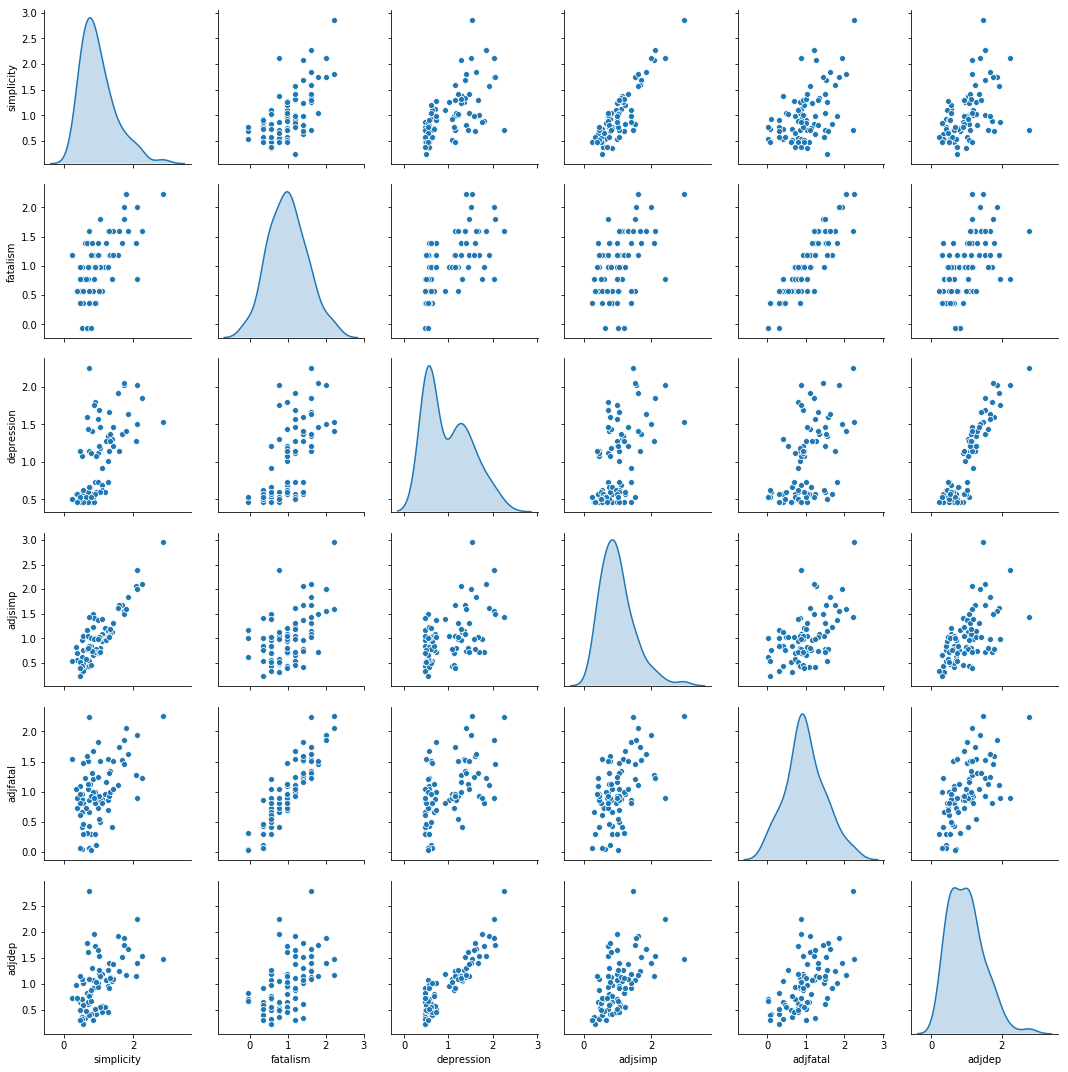

In [8]:
import seaborn as sns
sns.pairplot(mydata, diag_kind='kde') 

In [9]:
##Based on the kde plots, we can work with 2 or 3 clusters

In [10]:
##Scale the data
from scipy.stats import zscore

mydata_z = mydata.apply(zscore)


In [36]:
mydata.shape[0] # gives total number of records.

82

In [65]:
mydata_z.head()

,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep
0,-0.141205,-1.296147,-0.807541,-0.484282,-1.797534,-1.169856
1,-0.179157,0.371048,-0.547611,-0.549018,-0.001710,-0.972187
2,-0.938421,-2.129764,-0.937516,-0.761136,-1.935619,-0.589627
3,-0.520827,-1.296147,-0.872518,-0.331588,-1.162751,-0.691450
4,-0.938421,-0.462549,-1.002493,-1.052499,-0.373826,-0.935361


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

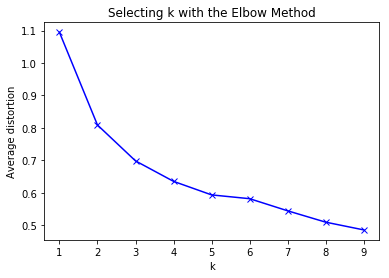

In [12]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]
cluster_error = []
for k in clusters:
    #create k clusters
    model=KMeans(n_clusters=k)
    model.fit(mydata)
    prediction=model.predict(mydata)
    
    # calculate distortion for each cluster
    meanDistortions.append(sum(np.min(cdist(mydata, model.cluster_centers_, 'euclidean'), axis=1)) / mydata.shape[0])
    
    #calculate inertia / variance.
    cluster_error.append(model.inertia_) 

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [34]:
cluster_error_df = pd.DataFrame({'k':clusters,'Cluster_Error':cluster_error,'Distortion':meanDistortions})

In [35]:
cluster_error_df

,k,Cluster_Error,Distortion
0,1,121.499961,1.095092
1,2,62.782816,0.808988
2,3,47.111637,0.698293
3,4,39.581172,0.635134
4,5,35.331957,0.593404
5,6,32.245360,0.581718
6,7,28.519561,0.544288
7,8,26.281876,0.509269
8,9,23.508834,0.485405


In [17]:
#Set the value of k=3
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)

In [18]:
kmeans.fit(mydata_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
    random_state=2345, tol=0.0001, verbose=0)

In [19]:
centroids = kmeans.cluster_centers_

In [20]:
centroids

array([[-0.00240129,  0.30593064,  0.47588456, -0.15570731,  0.21543758,
         0.41698529],
       [-0.60393647, -0.72164273, -0.90062454, -0.48447657, -0.63244733,
        -0.83635699],
       [ 1.72480697,  1.30084619,  1.39190785,  1.7621744 ,  1.26973449,
         1.35397533]])

In [21]:
#Clculate the centroids for the columns to profile
centroid_df = pd.DataFrame(centroids, columns = list(mydata_z) )

In [22]:
print(centroid_df)

   simplicity  fatalism  depression   adjsimp  adjfatal    adjdep
0   -0.002401  0.305931    0.475885 -0.155707  0.215438  0.416985
1   -0.603936 -0.721643   -0.900625 -0.484477 -0.632447 -0.836357
2    1.724807  1.300846    1.391908  1.762174  1.269734  1.353975


#### Cluster 1 has the lowest values and cluster 2 has the highest values

In [23]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [24]:
# Joining the label dataframe with the data frame.
df_labeled = mydata.join(df_labels)

In [49]:
df_analysis = (df_labeled.groupby(['labels'] , axis=0)).head(df_analysis.shape[0])  # the groupby creates a groupeddataframe that needs 
# to be converted back to dataframe. 
df_analysis

,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep,labels
0,0.92983,0.35589,0.59870,0.75934,0.10673,0.41865,1
1,0.91097,1.18439,0.72787,0.72717,0.99915,0.51688,1
2,0.53366,-0.05837,0.53411,0.62176,0.03811,0.70699,1
3,0.74118,0.35589,0.56641,0.83522,0.42218,0.65639,1
4,0.53366,0.77014,0.50182,0.47697,0.81423,0.53518,1
5,0.62799,1.39152,0.56641,0.40664,1.23261,0.34042,1
6,0.77891,0.35589,0.46953,0.84556,0.29789,0.42168,1
7,0.83550,0.56301,0.53411,1.49961,1.20366,1.08127,1
8,0.51480,0.77014,0.46953,0.31082,0.65651,0.36337,1
9,0.87323,0.35589,0.46953,1.40836,0.85391,0.91711,1


In [38]:
#df_labeled['labels'].value_counts()  
#counting the datapoints associatedwith each cluster
print('Elements in Cluster 1:',kmeans.labels_[kmeans.labels_==0].size)
print('Elements in Cluster 2:',kmeans.labels_[kmeans.labels_==1].size)
print('Elements in Cluster 3:',kmeans.labels_[kmeans.labels_==2].size)

Elements in Cluster 1: 32
Elements in Cluster 2: 37
Elements in Cluster 3: 13


In [46]:
mydata_z.columns

Index(['simplicity', 'fatalism', 'depression', 'adjsimp', 'adjfatal',
       'adjdep'],
      dtype='object')

In [27]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

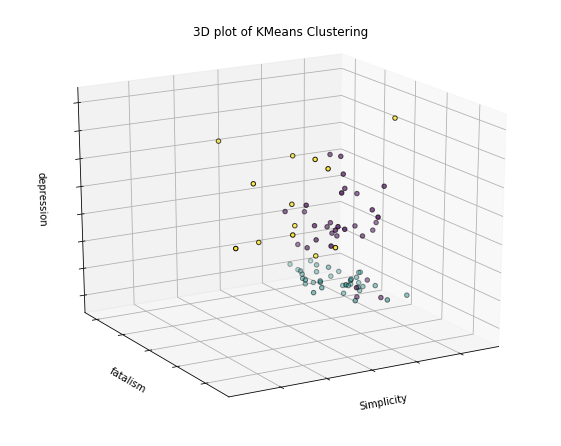

In [67]:
## 3D plots of clusters
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
kmeans.fit(mydata_z)
labels = kmeans.labels_
ax.scatter(mydata_z.iloc[:, 0], mydata_z.iloc[:, 1], mydata_z.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Simplicity')
ax.set_ylabel('fatalism')
ax.set_zlabel('depression')
ax.set_title('3D plot of KMeans Clustering')

In [29]:
# Let us try with K = 2
final_model=KMeans(2)
final_model.fit(mydata)
prediction=final_model.predict(mydata)

#Append the prediction 
mydata["GROUP"] = prediction
print("Groups Assigned : \n")
mydata[["depression", "GROUP"]]

Groups Assigned : 



,depression,GROUP
0,0.59870,0
1,0.72787,0
2,0.53411,0
3,0.56641,0
4,0.50182,0
5,0.56641,0
6,0.46953,0
7,0.53411,0
8,0.46953,0
9,0.46953,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000008C6C0EC2B0>,
      dtype=object)

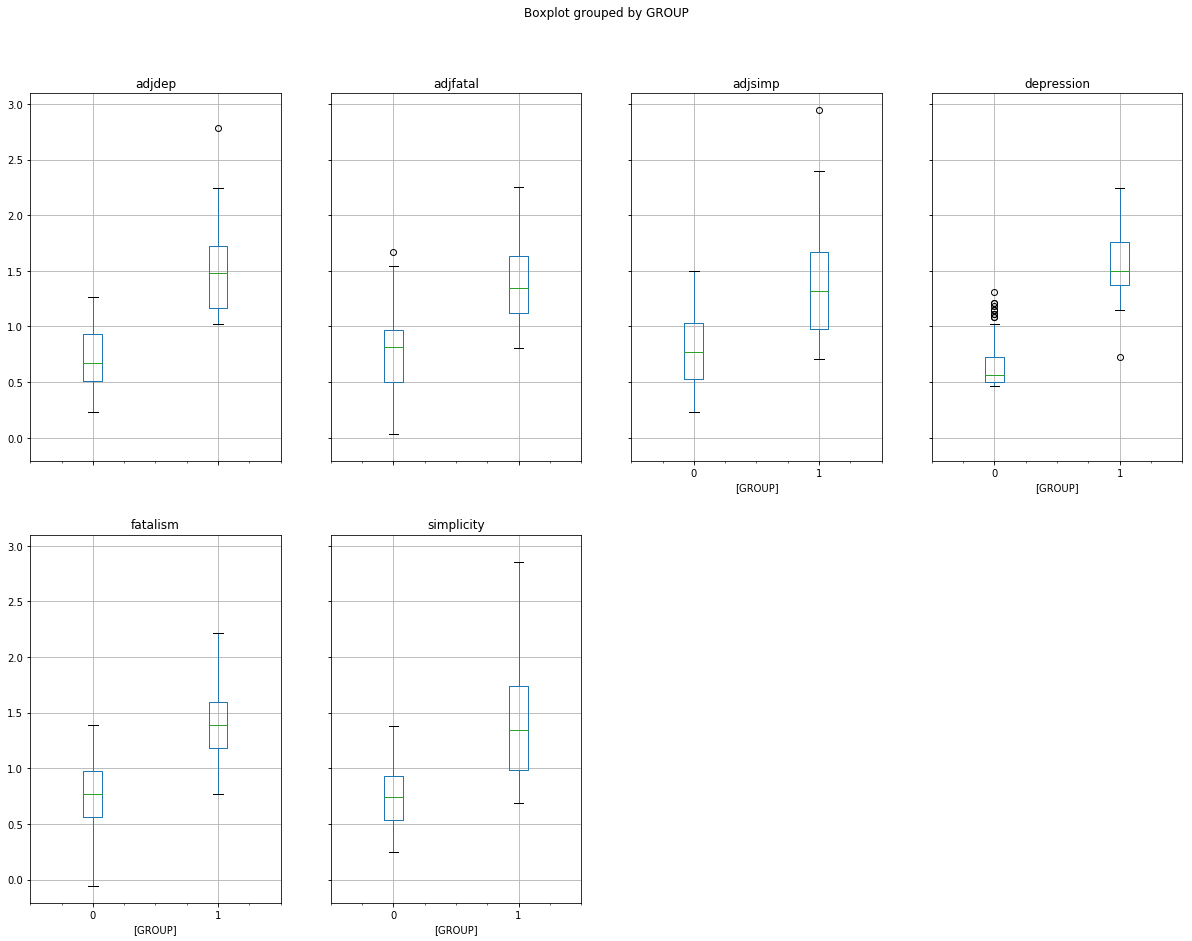

In [30]:
#plt.scatter(mydata["simplicity"][mydata.GROUP==0],
             #mydata["simplicity"][mydata.GROUP==1],c = colors, alpha=0.5)
    


mydata.boxplot(by = 'GROUP',  layout=(2,4), figsize=(20, 15))

In [31]:
# 2 clusters gives a clear separation of high and low values

In [32]:
#To determine if a relationship exists between black and white thinking(simplicity) and depression. 
mydata['simplicity'].corr(mydata['depression'])

0.6432667885861313

The correlation coefficient above indicates that the relationship between black and white thinking and depression can be 
considered moderate and positive. This means that we can see a clear relationship between black and white thinking and 
Depression, although the relationship is not perfect. The fact that the correlation coefficient is positive, indicates that 
higher levels of black and white thinking is associated with higher levels of depression

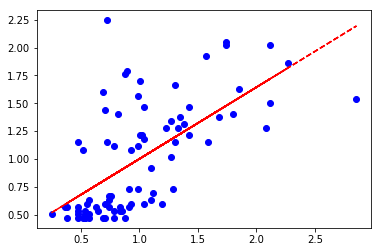

In [53]:
%matplotlib inline
import pandas as pd
plt.plot(mydata['simplicity'], mydata['depression'], 'bo')
z = np.polyfit(mydata['simplicity'], mydata['depression'],1)
p = np.poly1d(z)
plt.plot(mydata['simplicity'], p(mydata['simplicity']), "r--")

#geom_point()

In [31]:
# As you can see from the above graphic, although the data does not form a perfectly straight line, it does fall in a way that 
#indicates a positive relationship. Therefore, we can once again conclude that there is a relationship between black and white 
#thinking and depression. It is important to note, however, that correlation does not in any way indicate causality and is merely
#indicative of a relationship between the two.